In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [2]:
def calculate_accuracy(model):
    # CSV 파일 읽기
    df = pd.read_csv(f"../data/train_add-{model}-answer.csv")

    # problems 컬럼에서 original_answer 추출
    df["original_answer"] = df["problems"].apply(lambda x: ast.literal_eval(x)["answer"])

    # 모델 예측과 원래 정답 비교
    df["is_correct"] = df["original_answer"].astype(str) == df[f"{model}_answer"].astype(str)

    # 정확도 계산
    correct_count = df["is_correct"].sum()
    total_count = len(df)
    accuracy = correct_count / total_count * 100

    # 결과 출력
    print(f"Model: {model}")
    print(f"Total Questions: {total_count}")
    print(f"Correct Answers: {correct_count}")
    print(f"Accuracy: {accuracy:.2f}%")

    # return accuracy

In [3]:
calculate_accuracy("gpt-3.5-turbo")

Model: gpt-3.5-turbo
Total Questions: 2031
Correct Answers: 1530
Accuracy: 75.33%


In [4]:
calculate_accuracy("gpt-4o")

Model: gpt-4o
Total Questions: 2031
Correct Answers: 1841
Accuracy: 90.65%


In [5]:

calculate_accuracy("gpt-4o-mini")

Model: gpt-4o-mini
Total Questions: 2031
Correct Answers: 1788
Accuracy: 88.04%


In [6]:
def calculate_accuracy_and_errors(model):
    # CSV 파일 읽기
    df = pd.read_csv(f"../data/train_add-{model}-answer.csv")

    # problems 컬럼에서 original_answer 추출
    df["original_answer"] = df["problems"].apply(lambda x: ast.literal_eval(x)["answer"])

    # 모델 예측과 원래 정답 비교
    df["is_correct"] = df["original_answer"].astype(str) == df[f"{model}_answer"].astype(str)

    # 틀린 답변 추출
    errors_df = df[df["is_correct"] == False].copy()
    errors_df[f"{model}_answer"] = df[f"{model}_answer"]

    return errors_df[["id", "original_answer", f"{model}_answer"]]

In [7]:
errors_gpt3 = calculate_accuracy_and_errors("gpt-3.5-turbo")
errors_gpt4 = calculate_accuracy_and_errors("gpt-4o")
errors_gpt4_mini = calculate_accuracy_and_errors("gpt-4o-mini")

# 모든 모델이 틀린 문항을 모은 데이터프레임
all_errors = errors_gpt3.merge(errors_gpt4, on=["id", "original_answer"], how="inner", suffixes=("_gpt3", "_gpt4"))
all_errors = all_errors.merge(errors_gpt4_mini, on=["id", "original_answer"], how="inner")
# all_errors.rename(columns={"gpt-4o-mini_answer": "model_answer_gpt4_mini"}, inplace=True)

gpt_4type = errors_gpt4.merge(errors_gpt4_mini, on=["id", "original_answer"], how="inner")


In [8]:
all_errors

,id,original_answer,gpt-3.5-turbo_answer,gpt-4o_answer,gpt-4o-mini_answer
0,generation-for-nlp-427,4,3,2,3
1,generation-for-nlp-431,3,4,1,2
2,generation-for-nlp-434,1,2,2,2
3,generation-for-nlp-443,2,3,3,3
4,generation-for-nlp-451,2,3,4,4
...,...,...,...,...,...
84,generation-for-nlp-2248,1,2,2,2
85,generation-for-nlp-2453,1,4,2,2
86,generation-for-nlp-2625,5,2,2,2
87,generation-for-nlp-2788,3,4,1,4


In [9]:
errors_gpt3

,id,original_answer,gpt-3.5-turbo_answer
2,generation-for-nlp-427,4,3
4,generation-for-nlp-429,3,4
5,generation-for-nlp-431,3,4
6,generation-for-nlp-432,4,3
7,generation-for-nlp-433,3,4
...,...,...,...
2004,generation-for-nlp-2867,1,2
2007,generation-for-nlp-2870,3,1
2013,generation-for-nlp-2878,5,2
2024,generation-for-nlp-2890,1,2


In [10]:
errors_gpt4

,id,original_answer,gpt-4o_answer
0,generation-for-nlp-425,2,3
2,generation-for-nlp-427,4,2
5,generation-for-nlp-431,3,1
8,generation-for-nlp-434,1,2
15,generation-for-nlp-443,2,3
...,...,...,...
1951,generation-for-nlp-2802,3,1
1972,generation-for-nlp-2831,2,1
2004,generation-for-nlp-2867,1,3
2007,generation-for-nlp-2870,3,1


In [11]:
errors_gpt4_mini

,id,original_answer,gpt-4o-mini_answer
2,generation-for-nlp-427,4,3
4,generation-for-nlp-429,3,1
5,generation-for-nlp-431,3,2
6,generation-for-nlp-432,4,3
8,generation-for-nlp-434,1,2
...,...,...,...
1920,generation-for-nlp-2768,2,1
1928,generation-for-nlp-2776,5,4
1940,generation-for-nlp-2788,3,4
1941,generation-for-nlp-2789,4,3


In [12]:
gpt_4type

,id,original_answer,gpt-4o_answer,gpt-4o-mini_answer
0,generation-for-nlp-427,4,2,3
1,generation-for-nlp-431,3,1,2
2,generation-for-nlp-434,1,2,2
3,generation-for-nlp-443,2,3,3
4,generation-for-nlp-446,4,1,2
...,...,...,...,...
118,generation-for-nlp-2453,1,2,2
119,generation-for-nlp-2625,5,2,2
120,generation-for-nlp-2788,3,1,4
121,generation-for-nlp-2789,4,3,3


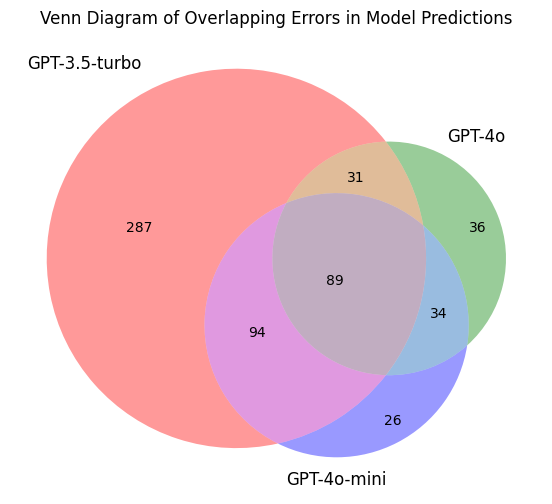

In [13]:
# 개별 오답 개수
gpt3_errors_count = len(errors_gpt3)
gpt4_errors_count = len(errors_gpt4)
gpt4_mini_errors_count = len(errors_gpt4_mini)

# 모델 간 겹치는 오답 개수 계산
gpt3_gpt4_overlap_df = errors_gpt3.merge(errors_gpt4, on=["id", "original_answer"], how="inner", suffixes=("_gpt3", "_gpt4"))
gpt3_gpt4_mini_overlap_df = errors_gpt3.merge(errors_gpt4_mini, on=["id", "original_answer"], how="inner", suffixes=("_gpt3", "_gpt4_mini"))
gpt4_gpt4_mini_overlap_df = errors_gpt4.merge(errors_gpt4_mini, on=["id", "original_answer"], how="inner", suffixes=("_gpt4", "_gpt4_mini"))
all_overlap_df = gpt3_gpt4_overlap_df.merge(errors_gpt4_mini, on=["id", "original_answer"], how="inner")

# 겹치는 오답 개수
gpt3_gpt4_overlap = len(gpt3_gpt4_overlap_df)
gpt3_gpt4_mini_overlap = len(gpt3_gpt4_mini_overlap_df)
gpt4_gpt4_mini_overlap = len(gpt4_gpt4_mini_overlap_df)
all_overlap = len(all_overlap_df)

# Venn Diagram 그리기
plt.figure(figsize=(8, 6))
venn = venn3(subsets=(
    gpt3_errors_count - gpt3_gpt4_overlap - gpt3_gpt4_mini_overlap + all_overlap,  # GPT-3.5-turbo만 틀린 문제 수
    gpt4_errors_count - gpt3_gpt4_overlap - gpt4_gpt4_mini_overlap + all_overlap,  # GPT-4o만 틀린 문제 수
    gpt3_gpt4_overlap - all_overlap,                                              # GPT-3.5-turbo와 GPT-4o가 둘 다 틀린 문제 수
    gpt4_mini_errors_count - gpt3_gpt4_mini_overlap - gpt4_gpt4_mini_overlap + all_overlap,  # GPT-4o-mini만 틀린 문제 수
    gpt3_gpt4_mini_overlap - all_overlap,                                         # GPT-3.5-turbo와 GPT-4o-mini가 둘 다 틀린 문제 수
    gpt4_gpt4_mini_overlap - all_overlap,                                         # GPT-4o와 GPT-4o-mini가 둘 다 틀린 문제 수
    all_overlap                                                                  # All three models
), set_labels=("GPT-3.5-turbo", "GPT-4o", "GPT-4o-mini"))

# 제목 추가
plt.title("Venn Diagram of Overlapping Errors in Model Predictions")
plt.savefig("model_errors_venn_diagram.png", format="png", dpi=300)
plt.show()

In [14]:
# gpt3_gpt4_overlap_df에 해당하는 ID 값을 train.csv에서 찾기
overlap_ids = all_errors["id"]
train_df = pd.read_csv("../data/train.csv")
filtered_train_df = train_df[train_df["id"].isin(overlap_ids)]

# 결과를 새로운 CSV 파일로 저장
filtered_train_df.to_csv("../data/overlap_errors_train_data.csv", index=False)
print("Filtered data saved to overlap_errors_train_data.csv")

Filtered data saved to overlap_errors_train_data.csv


In [1]:
print("f")

f
